Three way ANOVA

$$
Y_{ijkl} = \mu + \alpha_i + \beta_j + \gamma_k + (\alpha\beta)_{ij} + (\alpha\gamma)_{ik} + (\beta\gamma)_{jk} + (\alpha\beta\gamma)_{ijk} +  \epsilon_{ijkl}
$$

$$
l = 1,...,n_{ijk}
$$

$$
i = 1,....,a
$$

$$
j = 1,...,b
$$

$$
k=1,...,c
$$

####  What does each term in the model mean?
####  How many parameters are in this model?

## 2.1. Background and description of design

"The experiment conducted here was to test the effect certain factors such as refrigeration, stem length and water content have on the life of a rose. The outcome of such an experiment would prove to be extremely useful in the running of rose farms and florists.

"During the course of the experiment we jotted down the temperature for each day just in case we had to account for any particular pattern in the residual plots.

"One topic of particular interest was the length of time taken for the refrigerated roses to die. This took much longer than we anticipated, and due to time restrictions the roses had to be taken out of the refrigerator after 15 and a half days. By this time we knew in any case that there was an enormous difference between life in and out of refrigeration.

"Three factors, each consisting of two levels, are considered:

1. Stem length, 15cm or 25cm

2. Water content: tap water or tap water and citric acid (supposed to extend the life of cut flowers)

3. Refrigerated or at room temperature.

"The experiment was replicated so that 16 responses were obtained, the response variable being time (in days) taken for the rose to die.

"In order to remove biases from our results, caution should be taken to be consistent while conducting the experiment. The following were considered important points.

The roses tested should be identical. They should be the same size and colour, at the same stage of growth and picked at the same time from roughly the same area. We obtained our roses directly from the grower to enable us to be satisfied on this point.
The vases chosen for the experiment should also be identical; same size, shape, texture and translucency. For this experiment, (brown) beer bottles were chosen.
The water level in each vase should be the same. A water level of 1 inch from the top of the bottle was used.
The solution of water and citric acid should be consistent throughout. To achieve this, the solution should be mixed in one large jug, then poured into the vases.
The temperature each day should be noted. It may be needed if there is any dramatic drop or rise in temperature, that could have an effect on the results.
When can the rose be termed 'dead'? The point of death chosen for this experiment is when one would consider disposal of the rose under normal circumstances.
The roses were allocated randomly to the different treatments using a random number table.
"We expected the rose to last longer if the stem was shorter as the water would not have as far to travel; and there is a smaller probability of the rose dying if the rose was in a citric acid solution rather than water according to the advice of the rose farmer, and also if the rose was refrigerated, as we noted most florists and rose farms do try to keep their roses in a cold room."



In [1]:
data <- matrix(scan(text="
 6.5       1       2       2
23.0       1       1       1
11.0       1       1       2
 9.5       2       1       2
 9.5       2       1       2
23.5       2       1       1
24.0       1       2       1
21.5       2       2       1
10.0       2       2       2
23.5       2       1       1
11.0       1       1       2
 9.0       1       2       2
22.0       1       2       1
24.0       1       1       1
21.5       2       2       1
 8.0       2       2       2
"), ncol=4, nrow=16, byrow=T)

colnames(data)<- c("days","citric","length","refrig")

data <- data.frame(data)
data

,days,citric,length,refrig
1,6.5,1,2,2
2,23,1,1,1
3,11,1,1,2
4,9.5,2,1,2
5,9.5,2,1,2
6,23.5,2,1,1
7,24,1,2,1
8,21.5,2,2,1
9,10,2,2,2
10,23.5,2,1,1


In [2]:
## install.packages('lsmeans', repos='http://cran.us.r-project.org')
## install.packages('broom', repos='http://cran.us.r-project.org')

In [3]:
data$citric <- factor(data$citric)
data$length <- factor(data$length)
data$refrig <- factor(data$refrig)

modl <- lm(days ~ citric*length*refrig,data=data)

In [4]:
library(lsmeans)
library(broom) ## just to make things look nicer, not necessary

Loading required package: estimability


In [12]:
modl_sum <- summary(modl)
tidy(modl_sum$coefficients)

,.rownames,Estimate,Std..Error,t.value,Pr...t..
1,(Intercept),23.5,0.6903351,34.04144,6.058953e-10
2,citric2,-2.609024e-15,0.9762812,-2.67241e-15,1
3,length2,-0.5,0.9762812,-0.5121475,0.6223833
4,refrig2,-12.5,0.9762812,-12.80369,1.306213e-06
5,citric2:length2,-1.5,1.38067,-1.086429,0.3089371
6,citric2:refrig2,-1.5,1.38067,-1.086429,0.3089371
7,length2:refrig2,-2.75,1.38067,-1.991786,0.0815471
8,citric2:length2:refrig2,4.25,1.952562,2.176627,0.0611833


In [6]:
lsmeans(modl,"length")

NOTE: Results may be misleading due to involvement in interactions


 length  lsmean        SE df lower.CL upper.CL
 1      16.8750 0.3451675  8 16.07904 17.67096
 2      15.3125 0.3451675  8 14.51654 16.10846

Results are averaged over the levels of: citric, refrig 
Confidence level used: 0.95 

In [7]:
lsmeans(modl, ~ citric | length)

NOTE: Results may be misleading due to involvement in interactions


length = 1:
 citric lsmean        SE df lower.CL upper.CL
 1      17.250 0.4881406  8 16.12435 18.37565
 2      16.500 0.4881406  8 15.37435 17.62565

length = 2:
 citric lsmean        SE df lower.CL upper.CL
 1      15.375 0.4881406  8 14.24935 16.50065
 2      15.250 0.4881406  8 14.12435 16.37565

Results are averaged over the levels of: refrig 
Confidence level used: 0.95 

In [17]:
lsm<-lsmeans(modl, ~ citric| length)

NOTE: Results may be misleading due to involvement in interactions


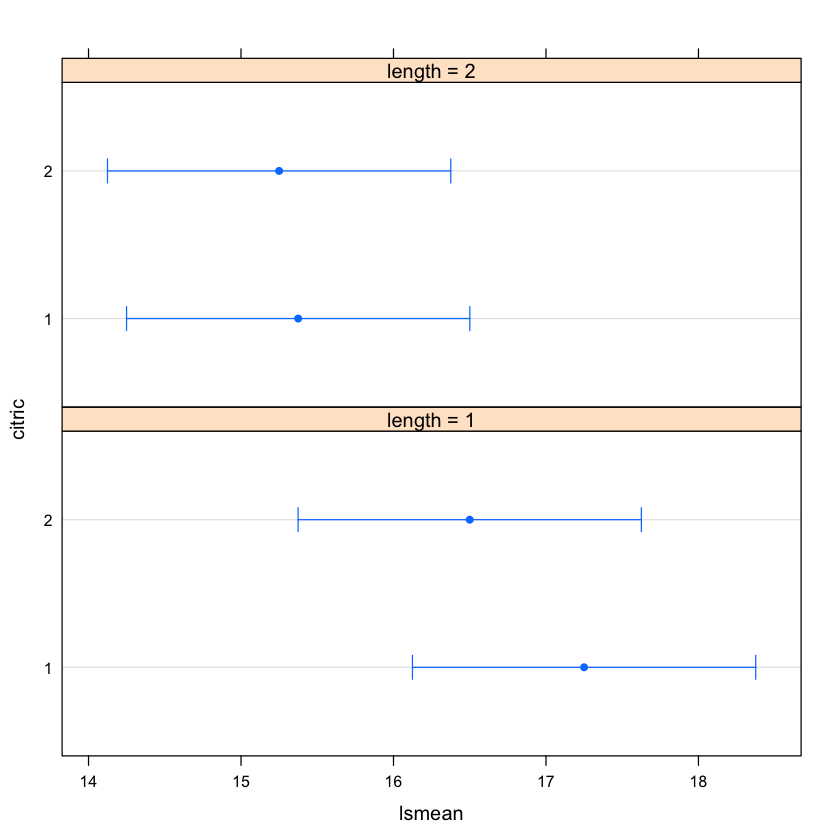

In [18]:
plot(lsm)

In [19]:
contrast(lsm, "pairwise")

length = 1:
 contrast estimate        SE df t.ratio p.value
 1 - 2       0.750 0.6903351  8   1.086  0.3089

length = 2:
 contrast estimate        SE df t.ratio p.value
 1 - 2       0.125 0.6903351  8   0.181  0.8608

Results are averaged over the levels of: refrig 

#### Calculate the Least Square Means for each level of citric by each level of refrig using either SAS or R lsmeans

#### Calculate the pairwise comparisons for levels of citric by each level of refrig using either SAS or R lsmeans

#### Perform an ANOVA F-test for the full 3-way ANOVA model and report your conclusion

An experiment was set up to compare the effect of different soil pH and calcium additives on the increase in trunk diameters for orange trees. Annual applications of elemental sulfur, gyp- sum, soda ash, and other ingredients were applied to provide pH value levels of 4, 5, 6, and 7. Three levels of a calcium supplement (100, 200, and 300 pounds per acre) were also applied. All factor–level combinations of these two variables were used in the experiment. At the end of a 2-year period, three diameters were examined at each factor–level combination. The data appear next.

In [27]:
data2 <- read.csv("../ASCII-comma/CH14/ex14-23.TXT", header=T)
data2

,X.Diameters.,X.Calcium.,X.pH.Value.,X.Ca100.
1,5.2,100,4,NA
2,5.9,100,4,NA
3,6.3,100,4,NA
4,7.1,100,5,NA
5,7.4,100,5,NA
6,7.5,100,5,NA
7,7.6,100,6,NA
8,7.2,100,6,NA
9,7.4,100,6,NA
10,7.2,100,7,NA


In [25]:
colnames(data2)<-c("diameters","calcium","ph", "ca100")
data2$calcium <- factor(data2$calcium)
data2$ph <- factor(data2$ph)
data2$ca100 <- factor(data2$ca100)

#### Write an appropriate statistical model.
#### Perform an analysis of variance and identify the experimental design. Use $\alpha=0.05$
#### Calculate evey pairwise comparison for calcium levels for each level of ph
#### Calculate the least square means for the ph levels.

A manufacturer whose daily supply of raw materials is variable and limited can use the material to produce two different products in various proportions. The profit per unit of raw ma- terial obtained by producing each of the two products depends on the length of a product’s man- ufacturing run and hence on the amount of raw material assigned to it. Other factors—such as worker productivity, machine breakdown, and so on—can affect the profit per unit as well, but their net effect on profit is random and uncontrollable. The manufacturer has conducted an ex- periment to investigate the effect of the level of supply of raw material, S, and the ratio of its as- signment, R, to the two product manufacturing lines on the profit per unit of raw material. The ultimate goal was to be able to choose the best ratio R to match each day’s supply of raw materi- als, S. The levels of supply of the raw material chosen for the experiment were 15, 18, and 21 tons. The levels of the ratio of allocation to the two product lines were 1/2, 1, and 2. The response was the profit (in cents) per unit of raw material supply obtained from a single day’s production. Three replications of each combination were conducted in a random sequence. The data for the 27 days are shown in the following table.
￼

In [29]:
data3 <- read.csv('../ASCII-comma/CH14/ex14-35.TXT', header=T)

In [31]:
colnames(data3) <-c("profit", "raw_material", "ratio")

#### Identify the two best combinations of R and S. Are these two combinations significantly different? Use a procedure that limits the error rate of all pairwise compar- isons of combinations to be no more than 0.05.